# 4. 数据计算与统计试题

4.1计算股票600104与600518的相关系数、spearman排序相关性与30天滚动的五日收益协方差

In [1]:
import pandas as pd
import numpy as np

In [2]:
stock1 = pd.read_excel('sz50.xlsx',sheetname='600104.XSHG',index_col='datetime')
stock2 = pd.read_excel('sz50.xlsx',sheetname='600518.XSHG',index_col='datetime')
concat = pd.concat([stock1.close.pct_change(5),stock2.close.pct_change(5)],keys=["stock1","stock2"],axis=1)

In [3]:
print(concat.corr())

          stock1    stock2
stock1  1.000000  0.348809
stock2  0.348809  1.000000


In [4]:
spearman = concat.corr(method="spearman")
print(spearman)

         stock1   stock2
stock1  1.00000  0.38035
stock2  0.38035  1.00000


In [5]:
rol = concat.rolling(window=30).cov()
print(rol.tail(6))

                              stock1    stock2
datetime                                      
2017-11-16 15:00:00 stock1  0.001200  0.000289
                    stock2  0.000289  0.000682
2017-11-17 15:00:00 stock1  0.001196  0.000291
                    stock2  0.000291  0.000710
2017-11-20 15:00:00 stock1  0.001192  0.000318
                    stock2  0.000318  0.000696


4.2
读取600104.XSHG的股票日线

利用正确的方法将日K线聚合成周K线

将周K线画出来

In [6]:
stock1 = pd.read_excel('sz50.xlsx',sheetname='600104.XSHG',index_col='datetime')

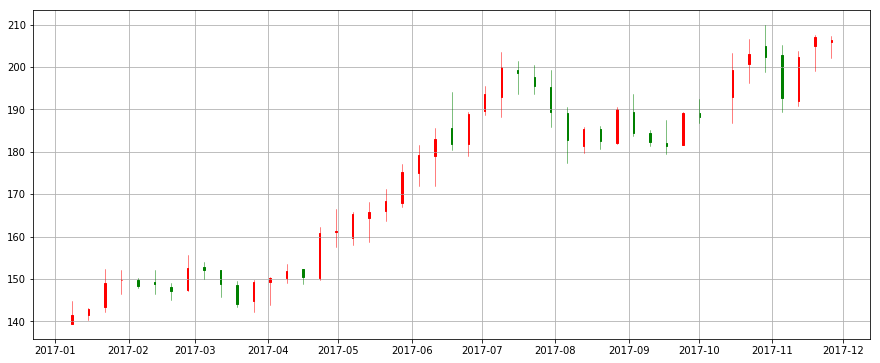

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
stock1week = stock1.resample('W').agg({'high':'max','low':'min','close':'last','open':'first'})
stock1week['time'] = list(map(date2num, stock1week.index))
candle = stock1week.reindex_axis(["time", "open", "high", "low", "close"], 1).values

import matplotlib.finance as mpf

fig, (ax) = plt.subplots(1,1, figsize=(15,12))
fig.subplots_adjust(bottom=0.5)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax.xaxis_date ()
plt.show()

4.3 读取股票601857数据，计算股票回报率，判断样本在2017-01-01,到2017-12-31，有没有服从正态分布，并判断样本均值是否为0

In [8]:
from statsmodels.stats.stattools import jarque_bera
stock3 = pd.read_excel('sz50.xlsx',sheetname='601857.XSHG',index_col='datetime')
stock3["pec1"] = stock3.close.pct_change()
returns = stock3.pec1[1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print ('判断样本分布服从正态分布')
else:
    print ('判断样本分布不服从正态分布')

判断样本分布不服从正态分布


In [9]:
from scipy import stats
t_test = stats.ttest_1samp(returns, 0)
if t_test.pvalue > 0.05:
    print ('判断样本均值为0')
else:
    print ('判断样本均值不为0')

判断样本均值为0


4.4用talib计算601901.XSHG以10天为周期的EMA，再算出DEMA，打印两个结果的最后5个数据

In [10]:
import talib as ta
stock4 = pd.read_excel('sz50.xlsx',sheetname='601901.XSHG',index_col='datetime')
EMA10 = ta.EMA(stock4.close,timeperiod=10)
print(EMA10.tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
dtype: float64


In [11]:
DEMA = ta.DEMA(stock4.close,timeperiod=10)
print(DEMA.tail())

datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
dtype: float64


# 5.爬虫考试，随意爬取一个网站做你想做的数据分析，并用可视化手段展示​，最后不要直接展示html代码,可为pdf、excel等形式

各类网站，如豆瓣网，雪球网，糗事百科及其它，内容只要不涉及相关禁令即可。

optional（可对爬虫的内容做更多处理）